In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sklearn.__version__

'1.0.2'

In [ ]:
data = pd.read_csv('preprocessed_loan_data.csv')

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,1.0,0.000000,0.0,1.0,0.070489,0.000000,0.198860,0.74359,1.0,0.0,0.0
1,LP001003,0.0,0.0,0.333333,0.0,1.0,0.054830,0.036192,0.172214,0.74359,1.0,1.0,1.0
2,LP001005,0.0,0.0,0.000000,0.0,0.0,0.035250,0.000000,0.082489,0.74359,1.0,0.0,0.0
3,LP001006,0.0,0.0,0.000000,1.0,1.0,0.030093,0.056592,0.160637,0.74359,1.0,0.0,0.0
4,LP001008,0.0,1.0,0.000000,0.0,1.0,0.072356,0.000000,0.191027,0.74359,1.0,0.0,0.0


In [ ]:
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [ ]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data = data.drop('Loan_ID',axis = 1)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.000000,0.0,1.0,0.070489,0.000000,0.198860,0.74359,1.0,0.0,0.0
1,0.0,0.0,0.333333,0.0,1.0,0.054830,0.036192,0.172214,0.74359,1.0,1.0,1.0
2,0.0,0.0,0.000000,0.0,0.0,0.035250,0.000000,0.082489,0.74359,1.0,0.0,0.0
3,0.0,0.0,0.000000,1.0,1.0,0.030093,0.056592,0.160637,0.74359,1.0,0.0,0.0
4,0.0,1.0,0.000000,0.0,1.0,0.072356,0.000000,0.191027,0.74359,1.0,0.0,0.0


In [ ]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
data.shape

(614, 12)

In [ ]:
X = data.drop('Loan_Status',axis = 1)
y = data['Loan_Status']

In [ ]:
X.shape , y.shape

((614, 11), (614,))

In [ ]:
#train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = data['Loan_Status'],random_state=10,test_size=0.2)

In [ ]:
(X_train.shape,y_train.shape),(X_test.shape,y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

In [ ]:
import keras
import tensorflow as tf 

In [ ]:
keras.__version__

'2.8.0'

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
from keras.models import Sequential
from keras.layers import InputLayer,Dense

In [ ]:
X_train.shape

(491, 11)

In [ ]:
X_train.shape[1]

11

In [ ]:
input_neurons = X_train.shape[1]

In [ ]:
output_neurons = 1 # 1 output neuron binary classification

In [ ]:
# number of hidden layers can be chosen at own as this is a hyperparameter
# number of neurons in hidden layers can also be chosen at own
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

### Defining the architecture of the model

In [ ]:
model = Sequential()
# in hidden layers ReLu activation function has been used 
# as it is a binary classification problem thus sigmoid activation function is used for output layer
model.add(InputLayer(input_shape = (input_neurons,)))
model.add(Dense(units = neuron_hidden_layer_1,activation = 'relu'))
model.add(Dense(units = neuron_hidden_layer_2,activation='relu'))
model.add(Dense(units = output_neurons,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


# Compiling the Model

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics = ['Accuracy'])
#binary_crossentropy loss function for binary classification problems

# Training the model

In [ ]:
model_history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 50)

Epoch 1/50
16/16 [==============================] - 2s 28ms/step - loss: 0.7084 - Accuracy: 0.4603 - val_loss: 0.6985 - val_Accuracy: 0.5203
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6944 - Accuracy: 0.5988 - val_loss: 0.6889 - val_Accuracy: 0.6504
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 0.6879 - Accuracy: 0.6578 - val_loss: 0.6854 - val_Accuracy: 0.6667
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6848 - Accuracy: 0.6741 - val_loss: 0.6824 - val_Accuracy: 0.6992
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6822 - Accuracy: 0.6843 - val_loss: 0.6798 - val_Accuracy: 0.6992
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6797 - Accuracy: 0.6864 - val_loss: 0.6777 - val_Accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6775 - Accuracy: 0.6843 - val_loss: 0.6753 - val_Accuracy: 0.6911
Epoch 8/50
16/16 [=

## Testing and Evaluating

In [ ]:
prediction = model.predict(X_test)
prediction = np.round(prediction).astype(int)

In [ ]:
prediction

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [ ]:
accuracy_score(y_test,prediction)

0.7886178861788617

# Plottings

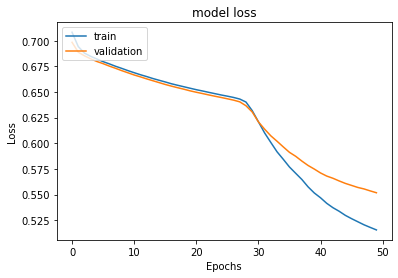

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','validation'],loc = 'upper left')
plt.show()

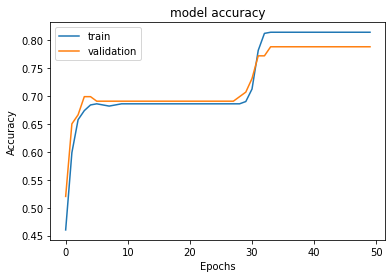

In [ ]:
plt.plot(model_history.history['Accuracy'])
plt.plot(model_history.history['val_Accuracy'])
plt.title('model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','validation'],loc = 'upper left')
plt.show()